# Latex Markdown and generating data with numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 
from matplotlib import cm

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
X = np.linspace(start=-3, stop=3, num=100)

In [3]:
X

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

# Example of simple Cost Function

## $f= x^2 + x + 1$

In [4]:
def f(x):
    return x**2 + x + 1;

In [5]:
generated_func_value = f(X)

In [6]:
generated_func_value

array([ 7.        ,  6.70064279,  6.40863177,  6.12396694,  5.8466483 ,
        5.57667585,  5.31404959,  5.05876951,  4.81083563,  4.57024793,
        4.33700643,  4.11111111,  3.89256198,  3.68135904,  3.4775023 ,
        3.28099174,  3.09182736,  2.91000918,  2.73553719,  2.56841139,
        2.40863177,  2.25619835,  2.11111111,  1.97337006,  1.84297521,
        1.71992654,  1.60422406,  1.49586777,  1.39485767,  1.30119376,
        1.21487603,  1.1359045 ,  1.06427916,  1.        ,  0.94306703,
        0.89348026,  0.85123967,  0.81634527,  0.78879706,  0.76859504,
        0.75573921,  0.75022957,  0.75206612,  0.76124885,  0.77777778,
        0.80165289,  0.8328742 ,  0.87144169,  0.91735537,  0.97061524,
        1.0312213 ,  1.09917355,  1.17447199,  1.25711662,  1.34710744,
        1.44444444,  1.54912764,  1.66115702,  1.7805326 ,  1.90725436,
        2.04132231,  2.18273646,  2.33149679,  2.48760331,  2.65105601,
        2.82185491,  3.        ,  3.18549128,  3.37832874,  3.57

# Visualization

Text(0, 0.5, 'f (x)')

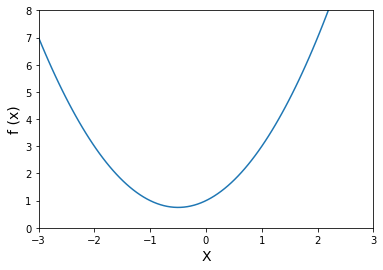

In [7]:
plt.plot(X, generated_func_value)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=14)
plt.ylabel('f (x)', fontsize=14)

# Creating charts with subplot, slope and derivatives

In [8]:
def df(x):
    return 2*x + 1

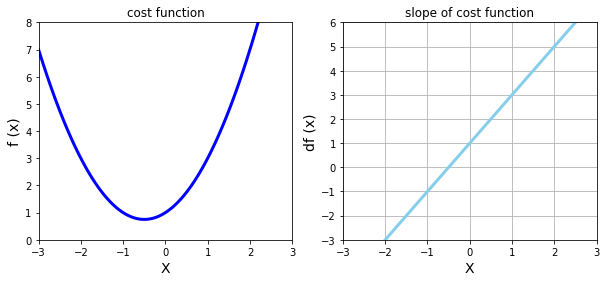

In [9]:
plt.figure(figsize=(10,4))

# cost function
plt.subplot(1,2,1) # row = 1, column = 2 and index=1
plt.title('cost function')
plt.plot(X, f(X), color = 'blue', linewidth=3)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=14)
plt.ylabel('f (x)', fontsize=14)

# derivative of cost function
plt.subplot(1,2,2)
plt.title('slope of cost function')
plt.plot(X, df(X), color='skyblue', linewidth=3)
plt.xlim(-3,3)
plt.ylim(-3,6)
plt.xlabel('X', fontsize=14)
plt.ylabel('df (x)', fontsize=14)
plt.grid()

# gradient descent algorithm

In [10]:
new_param = 3
learning_rate =0.1
precision = 0.0001

list_param = [new_param]
slope_list = [df(new_param)]

for i in range(500):
    old_param = new_param
    gradient = df(old_param)
    step_size = gradient * learning_rate
    new_param = old_param - step_size
    
    list_param.append(new_param)
    slope_list.append(df(new_param))
    
    if step_size < precision:
        print(i)
        break

print('local minimum is:',new_param)
print('slope or df(x) at this point is:', df(new_param))
print('costfunction or f(x) at this point is:', f(new_param))


40
local minimum is: -0.49962781616118024
slope or df(x) at this point is: 0.0007443676776395236
costfunction or f(x) at this point is: 0.7500001385208099


## graident descent visualtization

over previous plot

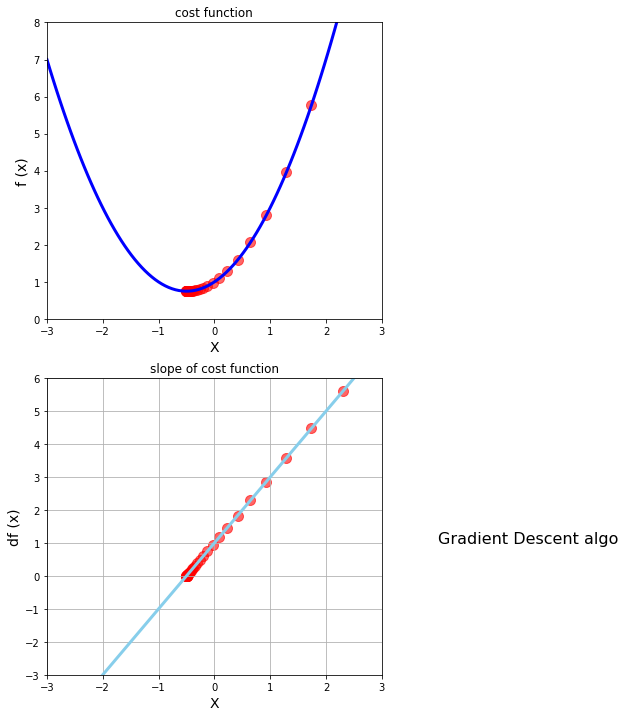

In [11]:
plt.figure(figsize=(6,12))

# cost function
plt.subplot(2,1,1) # row = 1, column = 2 and index=1
plt.title('cost function')

plt.plot(X, f(X), color = 'blue', linewidth=3)

value = np.array(list_param)
plt.scatter(list_param,f(value), color = 'red', s=100, alpha=0.6)
            
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=14)
plt.ylabel('f (x)', fontsize=14)

# derivative of cost function
plt.subplot(2,1,2)
plt.title('slope of cost function')

plt.plot(X, df(X), color='skyblue', linewidth=3)

plt.scatter(list_param, slope_list, color='red', s=100, alpha=0.6)

plt.text(4, 1, 'Gradient Descent algo', fontsize=16)
plt.xlim(-3,3)
plt.ylim(-3,6)
plt.xlabel('X', fontsize=14)
plt.ylabel('df (x)', fontsize=14)
plt.grid()

# Example 2 : Multiple minima vs Inital Guess and Advanced Function

## $$ g(x) = x^4-4x^2+5 $$

In [12]:
x_2 = np.linspace(-2, 2, 1000)

In [13]:
def g(x):
    return x**4 - 4*x**2 + 5

In [14]:
def dg(x):
    return 4*x**3 - 8*x

Text(0.5, 1.0, 'slope of cost function')

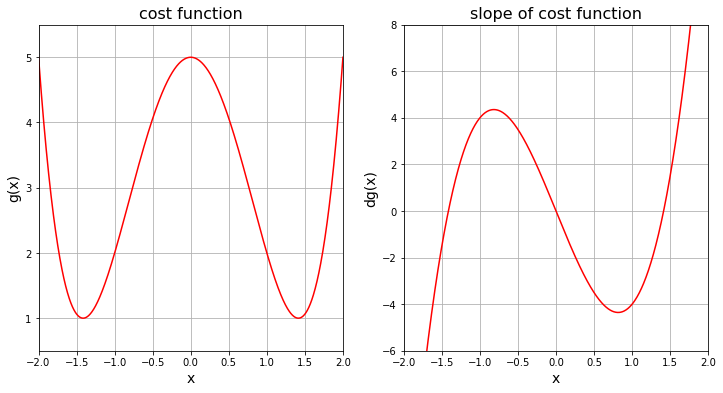

In [15]:
plt.figure(figsize=(12,6))
           
# cost function
plt.subplot(1,2,1)
plt.plot(x_2, g(x_2), color='red')
plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.title('cost function', fontsize=16)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.grid()

#slope or derivative or gradient of cost function
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), color='red')
plt.xlabel('x', fontsize=14)
plt.ylabel('dg(x)', fontsize=14)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()
plt.title('slope of cost function', fontsize=16)

## Function of Gradient descent algo

we can put a fuction inside another function as parameter as python recognizes fucntion as a object

In [16]:

def gradient_descent(derivative_func, initial_guess, learning_rate=0.02, precision=0.001, max_iter=300):
    new_param = initial_guess
    list_x = [new_param]
    list_slope = [derivative_func(new_param)]

    for i in range(max_iter):
        old_param = new_param
        gradient = derivative_func(old_param)
        step_size = gradient * learning_rate
        new_param = old_param - step_size
        list_x.append(new_param)
        list_slope.append(derivative_func(new_param))
        if ( abs(step_size) < precision):
            break
    return new_param, list_x, list_slope
 


In [17]:
local_minima, list_x, list_slope = gradient_descent(derivative_func = dg,
                                                    initial_guess = -0.5,
                                                    learning_rate = 0.02,
                                                    precision = 0.001)
print(len(list_x), local_minima)

23 -1.4122375085019094


Text(0.5, 1.0, 'slope of cost function')

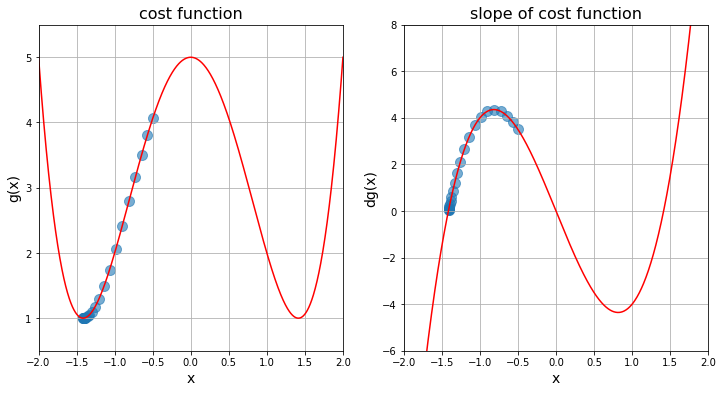

In [18]:
plt.figure(figsize=(12,6))
           
# cost function
plt.subplot(1,2,1)
plt.plot(x_2, g(x_2), color='red')

value = np.array(list_x)
plt.scatter(list_x, g(value), s=100, alpha=0.6) 

plt.xlabel('x', fontsize=14)
plt.ylabel('g(x)', fontsize=14)
plt.title('cost function', fontsize=16)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.grid()

#slope or derivative or gradient of cost function
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), color='red')
plt.scatter(list_x, list_slope, s=100, alpha=0.6)

plt.xlabel('x', fontsize=14)
plt.ylabel('dg(x)', fontsize=14)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()
plt.title('slope of cost function', fontsize=16)

# Divergence, Overflow & Tuples

## $$x^5 - 2x^4 + 2$$

In [19]:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5-2*x**4+2

def dh(x):
    return 5*x**4-8*x**3

72 -1.8398461123332792e+24 5.729226632843199e+97 -2.1081790694225687e+121


Text(0.5, 1.0, 'slope of cost function')

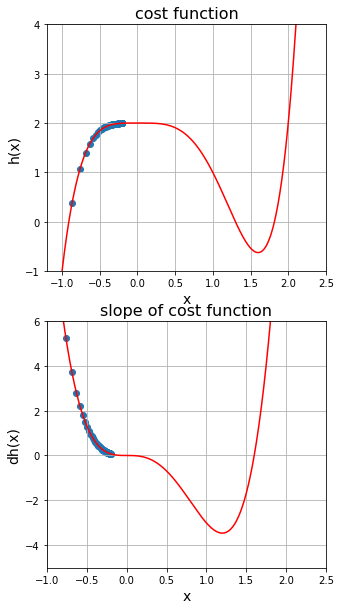

In [20]:
local_minima, list_x, slope_list = gradient_descent(dh, initial_guess=-0.2, max_iter=71)
# tulple unpacking above^
print(len(list_x), local_minima, dh(local_minima), h(local_minima))

plt.figure(figsize=(5,10))
           
# cost function
plt.subplot(2,1,1)
plt.plot(x_3, h(x_3), color='red')
plt.scatter(list_x, h(np.array(list_x)))
plt.xlabel('x', fontsize=14)
plt.ylabel('h(x)', fontsize=14)
plt.title('cost function', fontsize=16)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.grid()

#slope or derivative or gradient of cost function
plt.subplot(2,1,2)
plt.plot(x_3, dh(x_3), color='red')
plt.scatter(list_x, slope_list)
plt.xlabel('x', fontsize=14)
plt.ylabel('dh(x)', fontsize=14)
plt.xlim(-1,2.5)
plt.ylim(-5,6)
plt.grid()
plt.title('slope of cost function', fontsize=16)

In [21]:
import sys
sys.version
# sys.float_info.max

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

## Tuple

In [22]:
breakfast = 'bacon' ,'tea' ,'egg'
main, drink, side= breakfast # tuple unpacking
dishes = breakfast
print(dishes[1], dishes[1], dishes[2]) 

tea tea egg


# Learning rate

-> when learning rate is too big it never $CONVERGES$(keep on bouncing) or it $OVERFLOWS$. <br>
-> when learning rate is too small it take more $ITERATIONS$.

(0.0, 50.0)

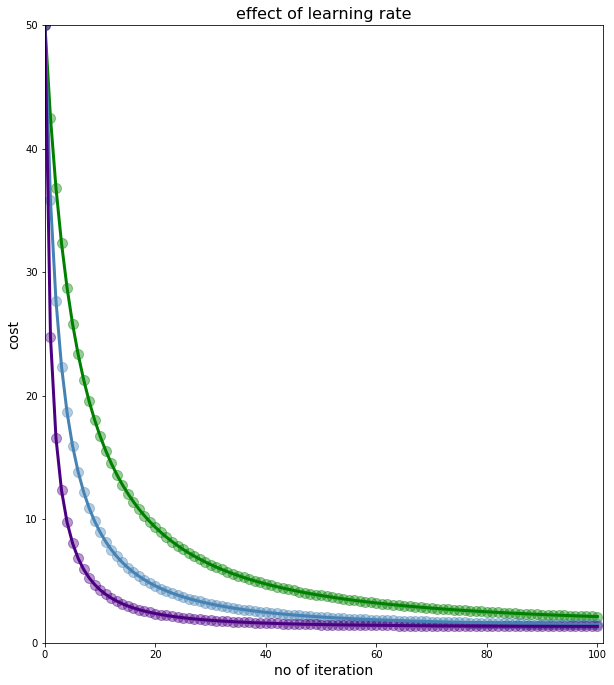

In [23]:
n=100
low_gamma = gradient_descent(dh, initial_guess=3, learning_rate=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(dh, initial_guess=3, learning_rate=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(dh, initial_guess=3, learning_rate=0.002, precision=0.0001, max_iter=n)

iteration_list = list(range(0, n+1))
value = low_gamma[1]
mid_value = mid_gamma[1]
high_value = high_gamma[1]

plt.figure(figsize=(10,25))
# cost function
plt.subplot(2,1,1)
plt.plot(iteration_list, g(np.array(value)), color='green', linewidth =3)
plt.plot(iteration_list, g(np.array(mid_value)), color='steelblue', linewidth =3)
plt.plot(iteration_list, g(np.array(high_value)), color='indigo', linewidth =3)

plt.scatter(iteration_list, g(np.array(value)), color='green', s=100, alpha=0.4)
plt.scatter(iteration_list, g(np.array(mid_value)), color='steelblue', s=100, alpha=0.4)
plt.scatter(iteration_list, g(np.array(high_value)), color='indigo', s=100, alpha=0.4)

plt.xlabel('no of iteration', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.title('effect of learning rate', fontsize=16)
plt.xlim(0,n+1)
plt.ylim(0,50)


# Data viz in 3D

## Minimise $$ f(x,y) = \frac{1}{3^{-x^2-y^2} + 1} $$

Minimise $$f(x,y) = \frac{1}{r + 1}$$  where $r = 3^{-x^2-y^2}$


In [24]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [25]:
# creatinf data for equation
x_new = np.linspace(start = -2, stop = 2, num =100)
y_new = np.linspace(start = -2, stop = 2 , num =100)


(-2.0, 2.0)

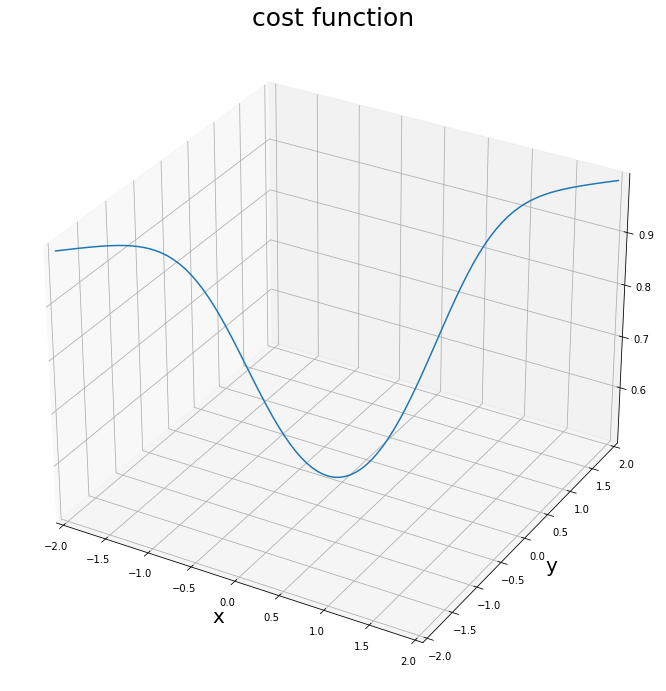

In [26]:
fig = plt.figure(figsize=(16,12)) # create new figure
ax = fig.add_subplot(projection='3d') # add 3d plot
ax.plot(x_new, y_new, f(x_new,y_new))
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('cost function', fontsize=25)
plt.xlim(-2,2)
plt.ylim(-2,2)

x_new, y_new = np.meshgrid(x_new, y_new)

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection = '3d')

ax.plot_surface(x_new, y_new, f(x_new, y_new), cmap=cm.Accent)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_zlabel('f(x,y)-cost', fontsize=15)
ax.set_title('cost function vs X vs Y', fontsize = 20)


# Partial Derivatives and sympy (symbolic computation)

## $$ \frac{\partial f}{\partial x}= \frac{2x \ln (3) \cdot 3^{-x^2-y^2}} {\left( 3^{-x^2-y^2}+1 \right)^2} $$
## $$ \frac{\partial f}{\partial y}= \frac{2y \ln (3) \cdot 3^{-x^2-y^2}} {\left( 3^{-x^2-y^2}+1 \right)^2} $$

In [27]:
a, b = symbols('x, y')
print('out cost function f(x,y) is', f(a,b))
print('f(x,y) at points x=1.8, y=1 is', f(a,b).evalf(subs={a:1.8,b:1}))
print('partial diffrential of f(x,y) is', diff(f(a,b),b))
print('diff(f(a,b)) at points x=1.8, y=1 is', (diff(f(a,b),a).evalf(subs={a:1.8,b:1})))

out cost function f(x,y) is 1/(3**(-x**2 - y**2) + 1)
f(x,y) at points x=1.8, y=1 is 0.990604794032582
partial diffrential of f(x,y) is 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
diff(f(a,b)) at points x=1.8, y=1 is 0.0368089716197505


## Batch gradient descent for multilple value using SYMPY

In [28]:
learning_rate = 0.1
precision = 0.001
max_iter = 200
params = np.array([1.8,1])
for i in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs = {a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs = {a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    step_size_x = gradient_x * learning_rate
    step_size_y = gradient_y * learning_rate
    step_size = np.array([step_size_x, step_size_y])
    params = params - step_size
    
    if abs(step_size[0]) < precision and abs(step_size[1]) < precision:
        break
    

print(params[0])
print(params[1])
print(f(params[0], params[1]))

0.0167774307878613
0.00932079488214517
0.500101171039786


In [29]:
# partial derivative function
def fpx(x,y):
    r = 3**(-x**2-y**2)
    return (2*x*log(3)*r)/(r + 1)**2
def fpy(x,y):
    return (2*3**(-x**2 - y**2)*y*log(3))/((3**(-x**2 - y**2) + 1)**2)
    

In [30]:
fpy(x=1.8, y=1)

0.020449428677639166

# Graphing 3D Gradient Descent & Adv numpy array

In [31]:
learning_rate = 0.1
precision = 0.001
max_iter = 200
params = np.array([1.8,1])
value_params = params.reshape(1,2)

for i in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    step_size_x = gradient_x * learning_rate
    step_size_y = gradient_y * learning_rate
    step_size = np.array([step_size_x, step_size_y])
    params = params - step_size
    
    value_params = np.append(value_params, params.reshape(1,2), 0) 
    
    if abs(step_size[0]) < precision and abs(step_size[1]) < precision:
        break
    

print(params[0])
print(params[1])
print(f(params[0], params[1]))


0.01677743078786126
0.009320794882145144
0.5001011710397865


In [32]:
# x_new, y_new = np.meshgrid(x_new, y_new)

# fig = plt.figure(figsize=(10,12))
# ax = fig.add_subplot(projection = '3d')

# ax.plot_surface(x_new, y_new, f(x_new, y_new), cmap=cm.coolwarm, alpha=0.4)
# ax.scatter(value_params[:,0], value_params[:,1], f(value_params[:,0], value_params[:,1]), s=30, color = 'red')
# ax.set_xlabel('X', fontsize=15)
# ax.set_ylabel('Y', fontsize=15)
# ax.set_zlabel('f(x,y)-cost', fontsize=15)
# ax.set_title('cost function vs X vs Y', fontsize = 20)

In [33]:
# advanced Numpy Array Practice

kirk = np.array([['momo', 'samosa']])
print(kirk.shape)

hs_band = np.array([['hello', 'hi'], ['nice', 'good']])
print(hs_band.shape)

the_roots = np.append(arr = hs_band, values= kirk, axis=0)


print(the_roots[:,0])

the_roots = np.append(arr=the_roots, values = [['too', 'much']], axis=0)
print(the_roots)
print(the_roots[:,1])

(1, 2)
(2, 2)
['hello' 'nice' 'momo']
[['hello' 'hi']
 ['nice' 'good']
 ['momo' 'samosa']
 ['too' 'much']]
['hi' 'good' 'samosa' 'much']


# Working with Data & real cost function

## Mean Squared Error(MSE)

### $$ SSR = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta{(x^{(i)})}\big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta{(x^{(i)})}\big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y -\hat{y}\big)^2 $$

In [108]:
# making  data
x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7,1)
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose()

# print(x_5)
# print(y_5)
regression = LinearRegression()
regression.fit(x_5,y_5)
slope = regression.coef_[0][0]
intercept = regression.intercept_[0] 
slope,intercept
#regression.score(x_5,y_5)

(1.2227264637835915, 0.8475351486029536)

Text(0, 0.5, 'y value')

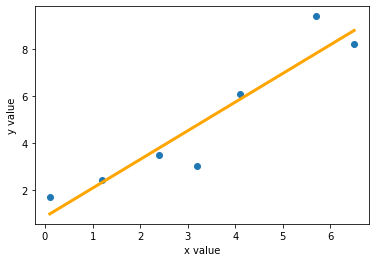

In [35]:
plt.scatter(x_5,y_5)
plt.plot(x_5, regression.predict(x_5), color = 'orange', linewidth = 3)
plt.xlabel('x value')
plt.ylabel('y value')

In [36]:
y_hat = regression.predict(x_5)
# y_at = intercept + slope * x_5
# print(y_hat)
# print(y_5)
(1/7)*sum((y_5 - y_hat)**2)


array([0.94796558])

In [37]:
# def mse(y,y_hat):
#     n = len(y)
#     return  (1/n) * sum((y-y_hat)**2)
# print(mse(y_5, y_hat))

In [38]:
def mse(y, y_hat):
    mse1 = mean_squared_error(y_5, y_hat)
    return mse1
mse(y_5,y_hat)

0.9479655759794577

# 3D Plot for the MSE cost function
 
Make data for thetas

In [75]:
nr_thetas = 200
th_0 = np.linspace(start = -1, stop = 3, num = nr_thetas)
th_1 = np.linspace(start = -1, stop = 3, num = nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [40]:
plot_cost = np.zeros((nr_thetas ,nr_thetas))

In [41]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
# print(plot_cost)

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

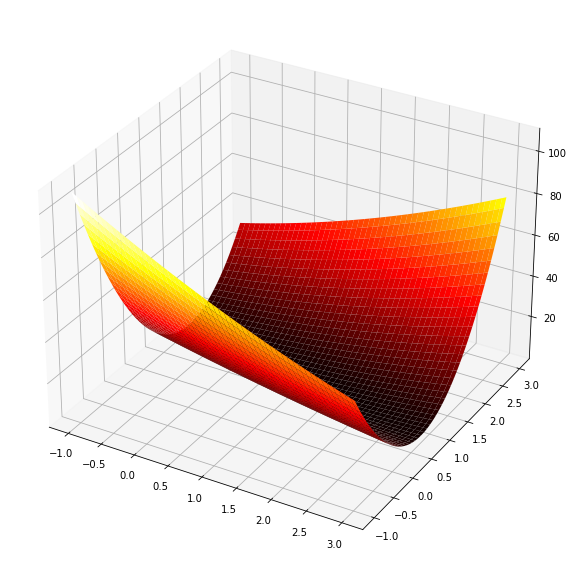

In [42]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.xlabel

In [43]:
plot_cost.min()

0.9483826526747164

In [44]:
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('min occurs at', ij_min)
print('slope at min', plot_t1[111][91])
print('intercept at min', plot_t0[111][91])

min occurs at (111, 91)
slope at min 1.2311557788944723
intercept at min 0.829145728643216


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

### $$ \frac {\partial MSE}{\partial \theta_0} = \frac{-2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$ 
### $$ \frac {\partial MSE}{\partial \theta_1} = \frac{-2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \cdot(x^{(i)}) $$ 

## Gradient descent on MSE cost function

In [92]:
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0]- thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0]- thetas[1]*x)*(x))
    return np.array([theta0_slope[0], theta1_slope[0]])
# thetas = np.array([2.9, 2.9])
# y_5 - thetas[0]-thetas[1]*x_5
# sum(y_5 - thetas[0]-thetas[1]*x_5)*(-2/y_5.size)
# print(grad(x_5,y_5,thetas))


[15.22285714 65.84      ]


In [69]:
a = [1,2]
b =[3 ,4]
#c = np.array([a,b])
#c = np.append(arr = a, values = b)
c = np.concatenate((a,b), axis=0)
c

array([1, 2, 3, 4])

In [169]:
learning_rate = 0.01
thetas = np.array([2.9,2.9])
precision = 0.0001
max_iter = 1000
thetas_list = thetas.reshape(1,2)
mse_list = mse(y_5, thetas[0]+thetas[1]*x_5)
for i in range(max_iter):
    old_thetas = thetas
    gradients = grad(x_5,y_5,old_thetas)
    step_size = gradients * learning_rate
    thetas = old_thetas - step_size
    mse_list = np.append(mse_list, mse(y_5, thetas[0]+thetas[1]*x_5))
    thetas_list = np.append(thetas_list, thetas.reshape(1,2), axis = 0)
      
print('intercept,slope,mse:',thetas[0], thetas[1], mse(y_5, thetas[0]+thetas[1]*x_5))
mse_list


intercept,slope,mse: 0.8532230461743415 1.2214935332607393 0.9479751138321334


array([71.786     , 33.55719479, 16.17569629, ...,  0.94797533,
        0.94797522,  0.94797511])

Text(0.5, 0, 'cost - MSE')

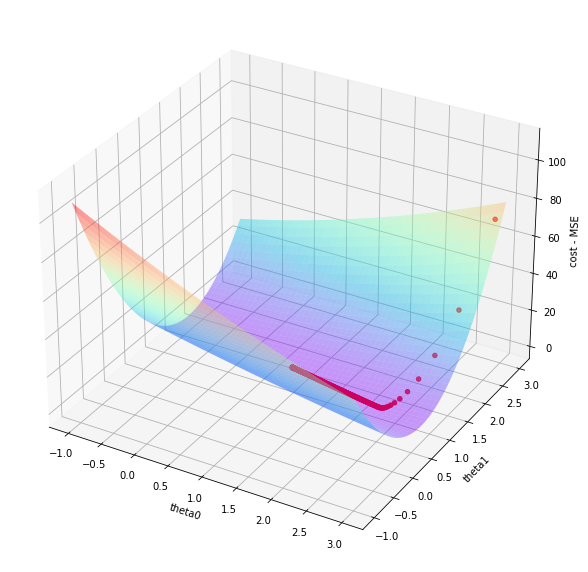

In [178]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(projection = '3d')

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
ax.scatter(thetas_list[:,0], thetas_list[:,1], mse_list, color='red')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost - MSE')
           

